In [1]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/timoh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/timoh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
textsample =["This thing seemed to overpower and astonish the little dark-brown dog, and wounded him to the heart. He sank down in despair at the child's feet. When the blow was repeated, together with an admonition in childish sentences, he turned over upon his back, and held his paws in a peculiar manner. At the same time with his ears and his eyes he offered a small prayer to the child."] 

X = textsample*3


["This thing seemed to overpower and astonish the little dark-brown dog, and wounded him to the heart. He sank down in despair at the child's feet. When the blow was repeated, together with an admonition in childish sentences, he turned over upon his back, and held his paws in a peculiar manner. At the same time with his ears and his eyes he offered a small prayer to the child.",
 "This thing seemed to overpower and astonish the little dark-brown dog, and wounded him to the heart. He sank down in despair at the child's feet. When the blow was repeated, together with an admonition in childish sentences, he turned over upon his back, and held his paws in a peculiar manner. At the same time with his ears and his eyes he offered a small prayer to the child.",
 "This thing seemed to overpower and astonish the little dark-brown dog, and wounded him to the heart. He sank down in despair at the child's feet. When the blow was repeated, together with an admonition in childish sentences, he turn

In [5]:
sentences = [nltk.sent_tokenize(article) for article in X]  
sentences


[['This thing seemed to overpower and astonish the little dark-brown dog, and wounded him to the heart.',
  "He sank down in despair at the child's feet.",
  'When the blow was repeated, together with an admonition in childish sentences, he turned over upon his back, and held his paws in a peculiar manner.',
  'At the same time with his ears and his eyes he offered a small prayer to the child.'],
 ['This thing seemed to overpower and astonish the little dark-brown dog, and wounded him to the heart.',
  "He sank down in despair at the child's feet.",
  'When the blow was repeated, together with an admonition in childish sentences, he turned over upon his back, and held his paws in a peculiar manner.',
  'At the same time with his ears and his eyes he offered a small prayer to the child.'],
 ['This thing seemed to overpower and astonish the little dark-brown dog, and wounded him to the heart.',
  "He sank down in despair at the child's feet.",
  'When the blow was repeated, together with

In [ ]:
sentences = nltk.sent_tokenize(X)  
words = nltk.word_tokenize(textsample)  
sentences 
[w for w in words if w.isalpha()]

In [9]:
import spacy
import numpy as np

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def extract_features(text):
    doc = nlp(text)
    
    # Sentence Length
    sentence_length = len(doc)
    
    # Dependency Labels
    dep_labels = [token.dep_ for token in doc]
    
    # Named Entity Tags
    named_entities = [ent.label_ for ent in doc.ents]
    num_named_entities = len(named_entities)
    
    # Averaging Word Embeddings
    # Note: Exclude out-of-vocabulary words and named entities
    embeddings = [token.vector for token in doc if not token.is_oov and not token.ent_type_]
    if embeddings:
        avg_embedding = np.mean(embeddings, axis=0)
    else:
        avg_embedding = np.zeros((len(doc.vocab.vectors),))
    
    # Add more features as needed
    
    return {
        'sentence_length': sentence_length,
        'dependency_labels': dep_labels,
        'num_named_entities': num_named_entities,
        'avg_embedding': avg_embedding
        # Include other feature representations here
    }

# Example usage
features = extract_features("Apple Inc. is an American multinational technology company headquartered in Cupertino, California.")
print(features)


{'sentence_length': 14, 'dependency_labels': ['compound', 'nsubj', 'ROOT', 'det', 'amod', 'amod', 'compound', 'attr', 'acl', 'prep', 'pobj', 'punct', 'appos', 'punct'], 'num_named_entities': 4, 'avg_embedding': array([], dtype=float64)}


In [2]:
import json

train_data = 'data/train.greedy_sent.json'

with open(train_data, 'r') as f:
    train_data = json.load(f)

In [4]:
train_articles = [article['article'] for article in train_data]
train_highlight_decisions = [article['greedy_n_best_indices'] for article in train_data]

In [18]:
import numpy as np

print(len(train_articles))

10000


In [38]:
# average article length (# sentences)
split_articles = [[s.strip() for s in article.split('.')] for article in train_articles]
train_highlight_decisions = [article['greedy_n_best_indices'] for article in train_data]
print(np.mean([len(article) for article in split_articles]))

43.0585


In [26]:
# average sentence length (# characters)
print(np.mean([len(sentence) for split_article in split_articles for sentence in split_article]))

91.84863383536351


In [35]:
# average number of 1s (kept sentences) for each article's gold label summary
print(np.mean([sum(sentence_labels) for sentence_labels in train_highlight_decisions]))

2.5733


In [67]:
import string
from nltk.corpus import stopwords

# Function to remove punctuation from a sentence
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))


In [68]:
stop_words = set(stopwords.words('english'))

flat_words = [
    word
    for article in split_articles
    for sentence in article
    for word in remove_punctuation(sentence).lower().split()
    if word not in stop_words
]

In [99]:
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

def plot_word_counts(word_list, n):
    word_counts = Counter(word_list)
    most_common_counts = word_counts.most_common(n)
    words = [word for word, count in most_common_counts]
    counts = [count for word, count in most_common_counts]

    plt.figure(figsize=(20, 5))
    sns.barplot(x=words, y=counts, color='lightblue')

    plt.yscale('log')
    plt.ylabel('Count (log scale)')
    plt.xticks([])
    plt.title(f'Top {n} Word Counts')

    # Adding horizontal lines at y=10000, y=1000, and y=100 with different colors and labels for the legend
    line10000 = plt.axhline(y=10000, color='orange', linestyle='--', label='10k')
    line1000 = plt.axhline(y=1000, color='green', linestyle='--', label='1k')
    line100 = plt.axhline(y=100, color='purple', linestyle='--', label='100')

    # Adding a legend to the plot
    plt.legend()

    plt.show()

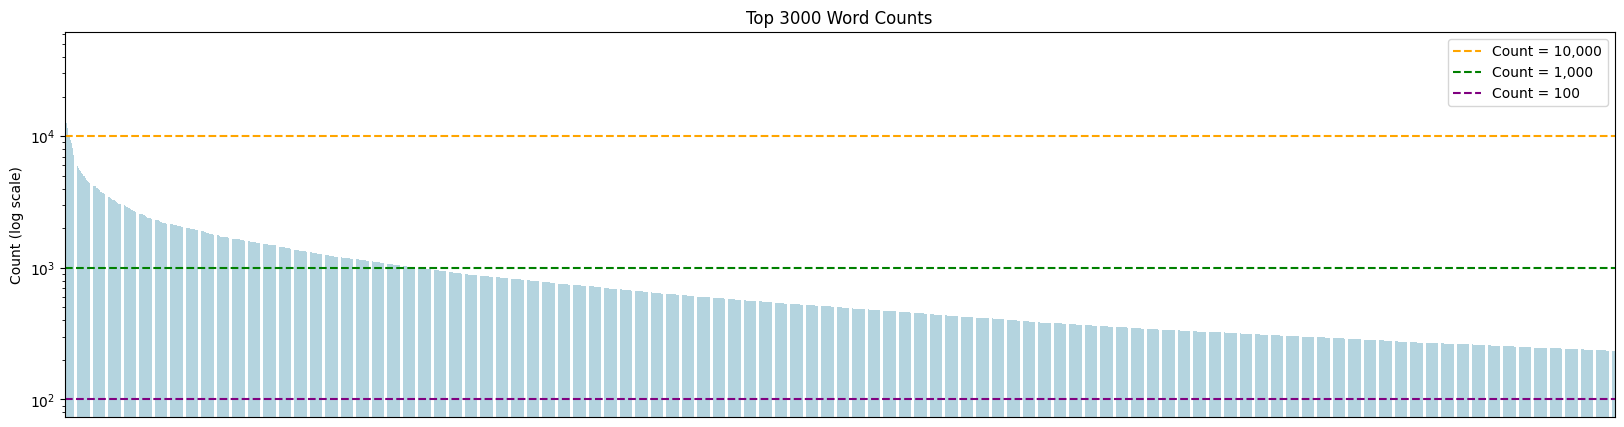

In [101]:
plot_word_counts(flat_words, 3000)

In [108]:
import os
import pickle

pkl_path = f'pickled_scores/embeddings_scores.pkl'

if os.path.exists(pkl_path):
    with open(pkl_path, 'rb') as file:
        sentence_scores = pickle.load(file)

In [116]:
[np.mean(article) for article in sentence_scores]

[0.057238792800019964,
 0.07230719441982962,
 0.08156402204899982,
 0.07807553543870271,
 0.060525311700862346,
 0.05851742065999781,
 0.07439511794267292,
 0.08473604683900815,
 0.15022370671687751,
 0.07715242201117133,
 0.07283666355517304,
 0.08357948164421418,
 0.09504347791206388,
 0.0524673617314183,
 0.13636488449225487,
 0.045105435911613506,
 0.06280521746607859,
 0.042536984278160585,
 0.08455296997612087,
 0.08461979052565906,
 0.07011707186120951,
 0.056948755172664546,
 0.07529235928695398,
 0.09154767218468791,
 0.05675603931510753,
 0.051579152368254964,
 0.06444070541205302,
 0.05214070008624309,
 0.07943458937018298,
 0.07971779992016527,
 0.12572524808711408,
 0.07383140131907578,
 0.07396490266017657,
 0.06948909033427007,
 0.04688195872526374,
 0.05701700575267465,
 0.058490977157824676,
 0.042381414792820725,
 0.08491295444091976,
 0.09078837841864208,
 0.09240013832832127,
 0.06056473205038125,
 0.07018506482666591,
 0.06419279231969714,
 0.04766561615908704,
 0.